Testing the VGG16 model as seen in https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c


- Importing libraries:

In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Loading data from directory. Might be used for data augmentation.

In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="covid19-dataset/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="covid19-dataset/test", target_size=(224,224))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


VGG16 model

In [3]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

Define optimizer

In [4]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Summary of the VGG16 model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

Fitting the model and saving the best one.

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', 
                             period=1)  #monitor='val_accuracy'
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, 
                           validation_steps=10,epochs=50,callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1327.8524 - accuracy: 0.2825
Epoch 00001: val_accuracy improved from -inf to 0.33913, saving model to vgg16_1.h5
10/10 [==============================] - 111s 11s/step - loss: 1327.8524 - accuracy: 0.2825 - val_loss: 1.0971 - val_accuracy: 0.3391
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.0857 - accuracy: 0.4190
Epoch 00002: val_accuracy improved from 0.33913 to 0.39500, saving model to vgg16_1.h5
10/10 [==============================] - 120s 12s/step - loss: 1.0857 - accuracy: 0.4190 - val_loss: 1.0789 - val_accuracy: 0.3950
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.0746 - accuracy: 0.4762
Epoch 00003: val_accuracy improved from 0.39500 to 0.52609, saving model to vgg16_1.h5
10/10 [==============================] - 120s 12s/step - loss: 1.0746 - accuracy: 0.4762 - val_loss: 1.0497 - val_ac

Plot to see the accuracy vs the epoch

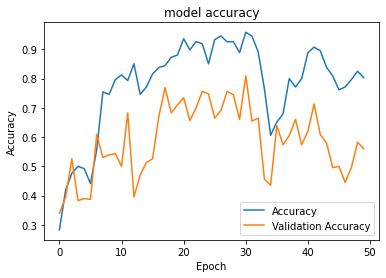

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
#plt.ylim([0, 20])
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()